In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [27]:
match_data = pd.read_csv('C:\\Users\\Al-Hussain Com\\Downloads\\Project\\Walmart  Clustering(k_means)\\PSL_Prediction\\IPL Dataset and Code\\IPL Matches 2008-2020.csv')
ball_data = pd.read_csv('C:\\Users\\Al-Hussain Com\\Downloads\\Project\\Walmart  Clustering(k_means)\\PSL_Prediction\\IPL Dataset and Code\\IPL Ball-by-Ball 2008-2020.csv')


In [28]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [29]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [30]:
match_data.isnull().sum()


id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [31]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [32]:
match_data.shape


(816, 17)

In [33]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [34]:
print("Match played:",match_data.shape)
print("\n Cities where Match Played:",match_data['city'].unique())
print('\n Teams  participated :',match_data['team1'].unique())

Match played: (816, 17)

 Cities where Match Played: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams  participated : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [35]:
match_data['Season ']=pd.DatetimeIndex(match_data['date']).year
print(match_data.columns)


Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'Season '],
      dtype='object')


In [36]:
match_per_season = match_data.groupby(['Season '])['id'].count().reset_index().rename(columns={'id': 'matches'})


In [37]:
print(match_per_season)

    Season   matches
0      2008       58
1      2009       57
2      2010       60
3      2011       73
4      2012       74
5      2013       76
6      2014       60
7      2015       59
8      2016       60
9      2017       59
10     2018       60
11     2019       60
12     2020       60


Text(0.5, 1.0, 'Total Matches per Season')

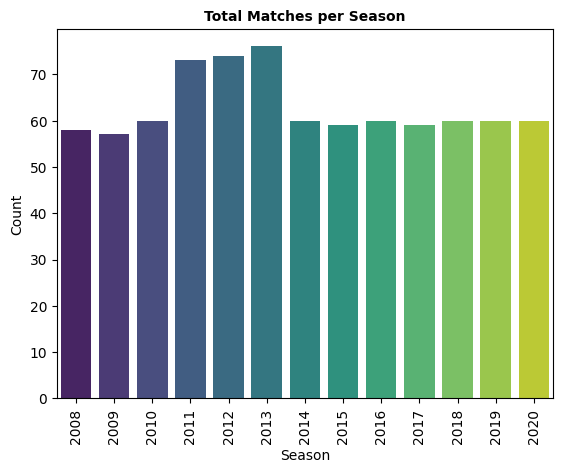

In [42]:
sns.countplot(x='Season ', data=match_data, palette='viridis')  # Using a predefined palette
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Matches per Season', fontsize=10, fontweight='bold')



In [39]:
season_data=match_data[['id','Season ']].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


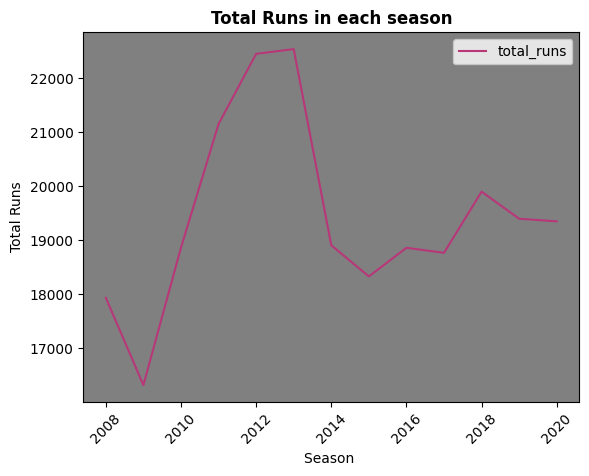

In [43]:

season = season_data.groupby(['Season '])['total_runs'].sum().reset_index()
p = season.set_index('Season ')

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the face color of the axis
ax.set_facecolor('gray')

# Plot the lineplot
sns.lineplot(data=p, palette='magma')  # Corrected 'platte' to 'palette'

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season ', fontsize=10)
plt.ylabel('Total Runs', fontsize=10)
plt.title('Total Runs in each season', fontsize=12, fontweight='bold')
plt.show()

In [52]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per  match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season ',inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


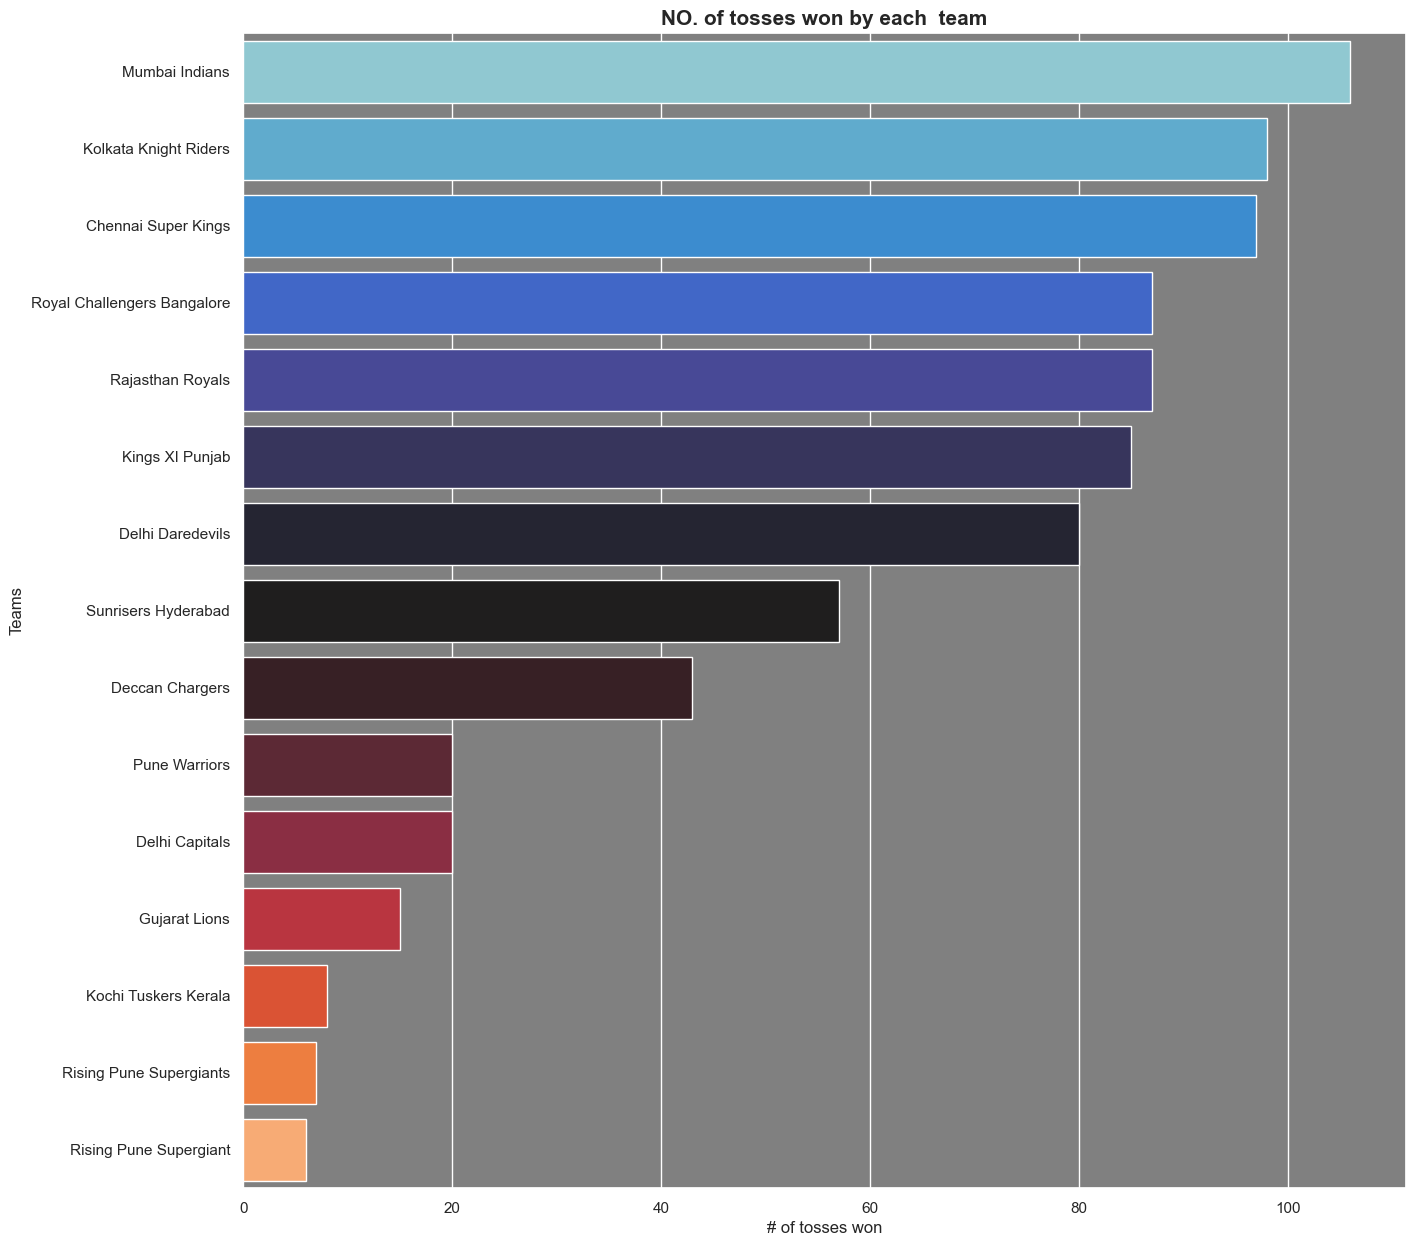

In [58]:
toss=match_data['toss_winner'].value_counts()
ax=plt.axes()
ax.set(facecolor="gray")
sns.set(rc={'figure.figsize':(15,10)},style='darkgrid')
ax.set_title('NO. of tosses won by each  team', fontsize=15,fontweight = 'bold')
sns.barplot(y=toss.index,x=toss, orient='h',palette='icefire',saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

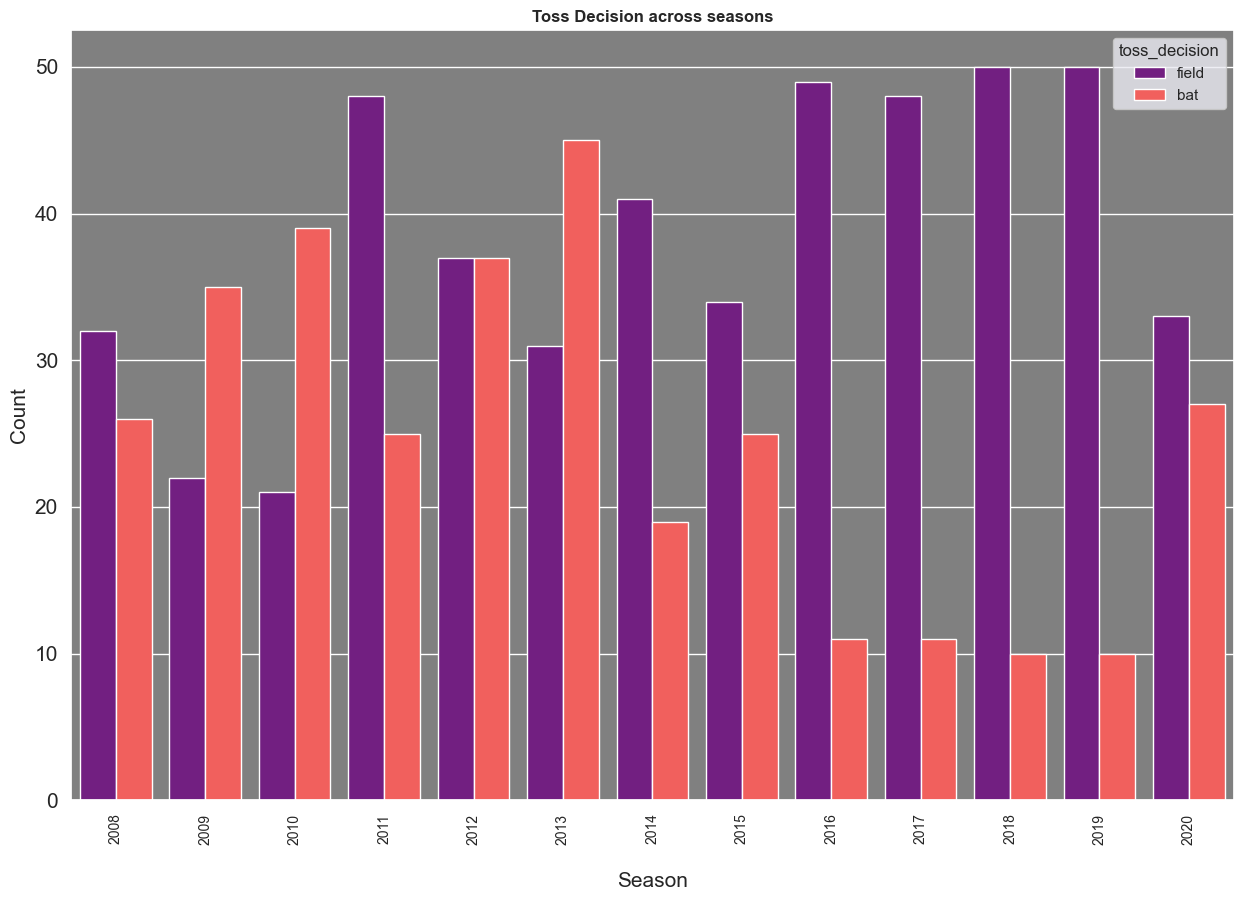

In [67]:
ax = plt.axes()
ax.set(facecolor='gray')
sns.countplot(x='Season ', hue='toss_decision', data=match_data, palette="magma", saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\nSeason', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title("Toss Decision across seasons", fontsize=12, fontweight='bold')
plt.show()


In [69]:
match_data["result"].value_counts()

result
wickets    435
runs       364
tie         13
Name: count, dtype: int64

In [71]:
match_data.venue[match_data.result!='run'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [72]:
match_data.venue[match_data.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [73]:
match_data.venue[match_data.toss_winner=='Kings XI Punjab'][match_data.winner=='Kings XI Pubjab'].mode()

Series([], Name: venue, dtype: object)

In [79]:
match_data.venue[match_data.toss_winner == 'Kings XI Punjab'][match_data.winner == 'Kings XI Punjab'].mode()
# match_data.venue[match_data.toss_winner == 'Kolkata Knight Riders'][match_data.winner == 'Kolkata Knight Riders'].mode()


0    Punjab Cricket Association Stadium, Mohali
Name: venue, dtype: object

In [80]:
match_data.winner[match_data.result !="run"].mode()

0    Mumbai Indians
Name: winner, dtype: object

In [81]:
match_data.winner[match_data.result!="wickets"].mode()

0    Mumbai Indians
Name: winner, dtype: object

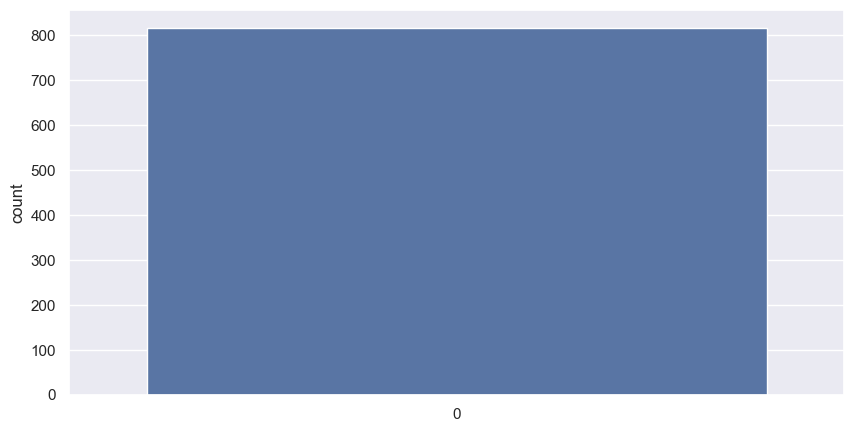

In [82]:
toss = match_data['toss_winner']==match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

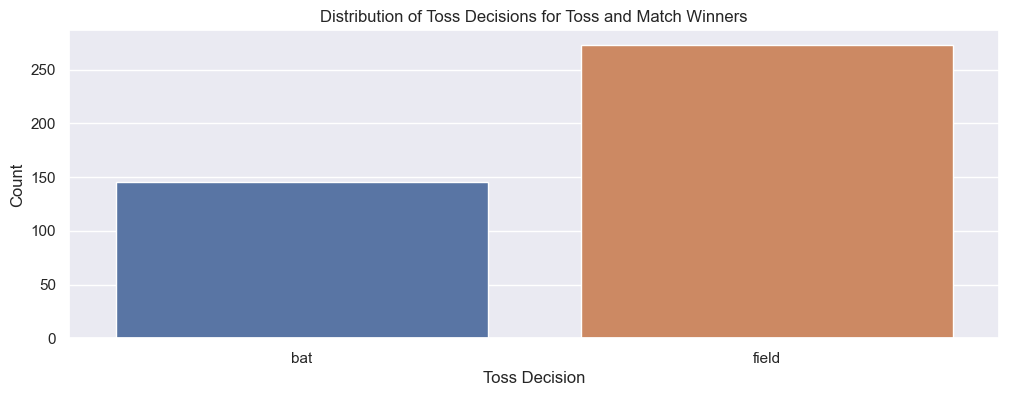

In [87]:
plt.figure(figsize=(12, 4))
sns.countplot(x=match_data[match_data.toss_winner == match_data.winner]['toss_decision'])
plt.title("Distribution of Toss Decisions for Toss and Match Winners")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.show()


In [89]:
player =(ball_data['batsman']=='SK Raina')
df_raina=ball_data[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


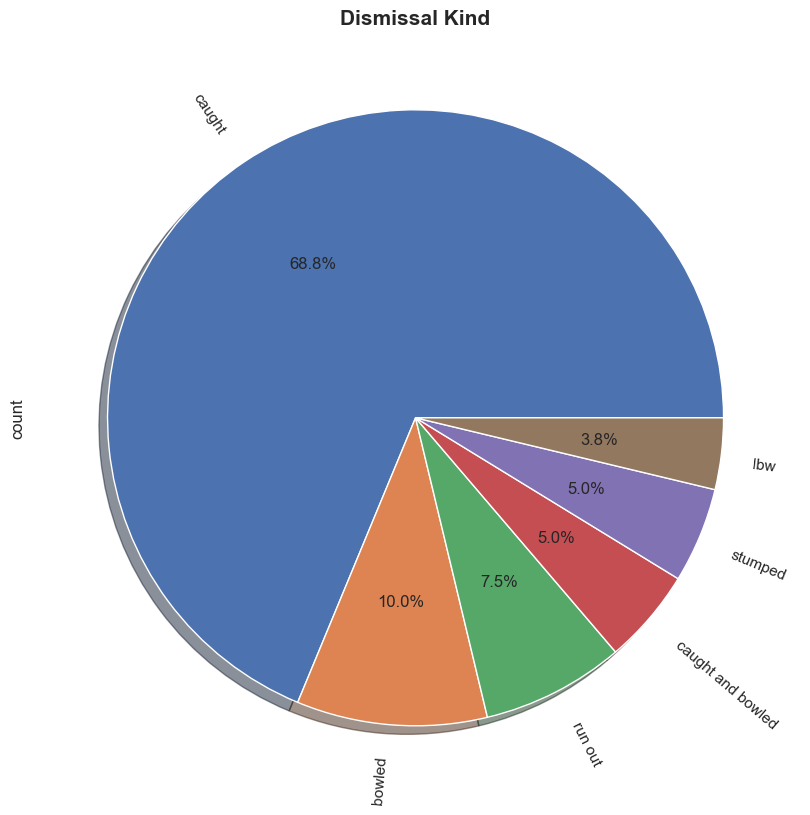

In [91]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title('Dismissal Kind',fontweight ='bold',fontsize=15)
plt.show()

In [94]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs
print("Runs Socored from 1'singles: ",count(df_raina,1))
print("Runs Socored from 2'doubles: ",count(df_raina,2))
print("Runs Socored from 3'thriples: ",count(df_raina,3))
print("Runs Socored from 4'four boundary: ",count(df_raina,4))
# print("Runs Socored from 5's: ",count(df_raina,5))
print("Runs Socored from 6'sixes boundary: ",count(df_raina,6))
# print("Runs Socored from 7's: ",count(df_raina,7))

Runs Socored from 1'singles:  1666
Runs Socored from 2'doubles:  528
Runs Socored from 3'thriples:  33
Runs Socored from 4'four boundary:  1972
Runs Socored from 6'sixes boundary:  1164


In [95]:
match_data[match_data["result_margin"]==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [99]:
# Grouping data by 'batsman' and summing up their runs
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()

# Correctly renaming the columns
runs.columns = ['Batsman', 'runs']  # Correcting the syntax here

# Sorting the DataFrame based on runs in descending order and getting the top 10
y = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)  # Corrected the method chaining here

# Displaying the corrected DataFrame
print(y)


          Batsman  runs
0         V Kohli  5878
1        SK Raina  5368
2       DA Warner  5254
3       RG Sharma  5230
4        S Dhawan  5197
5  AB de Villiers  4849
6        CH Gayle  4772
7        MS Dhoni  4632
8      RV Uthappa  4607
9       G Gambhir  4217


Text(0.5, 1.0, 'Top 10 Scores in IPL ')

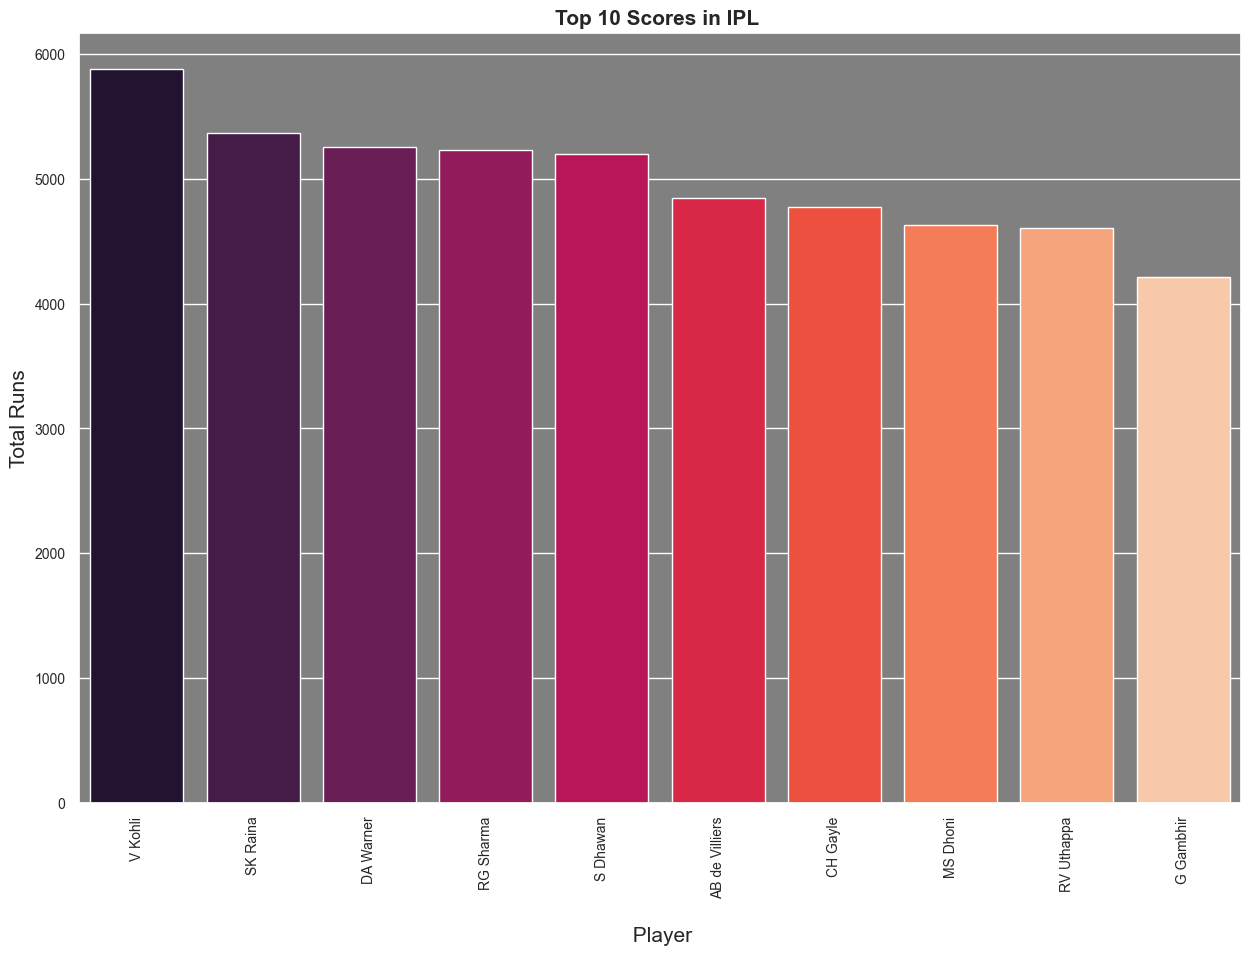

In [102]:
ax =plt.axes()
ax.set(facecolor="gray")
sns.barplot(x=y['Batsman'],y=y['runs'],palette='rocket',saturation=1)
# Adding labels and title to the plot
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.title  ('Top 10 Scores in IPL ',fontsize=15,fontweight='bold')


Text(0.5, 1.0, 'Player of the Match')

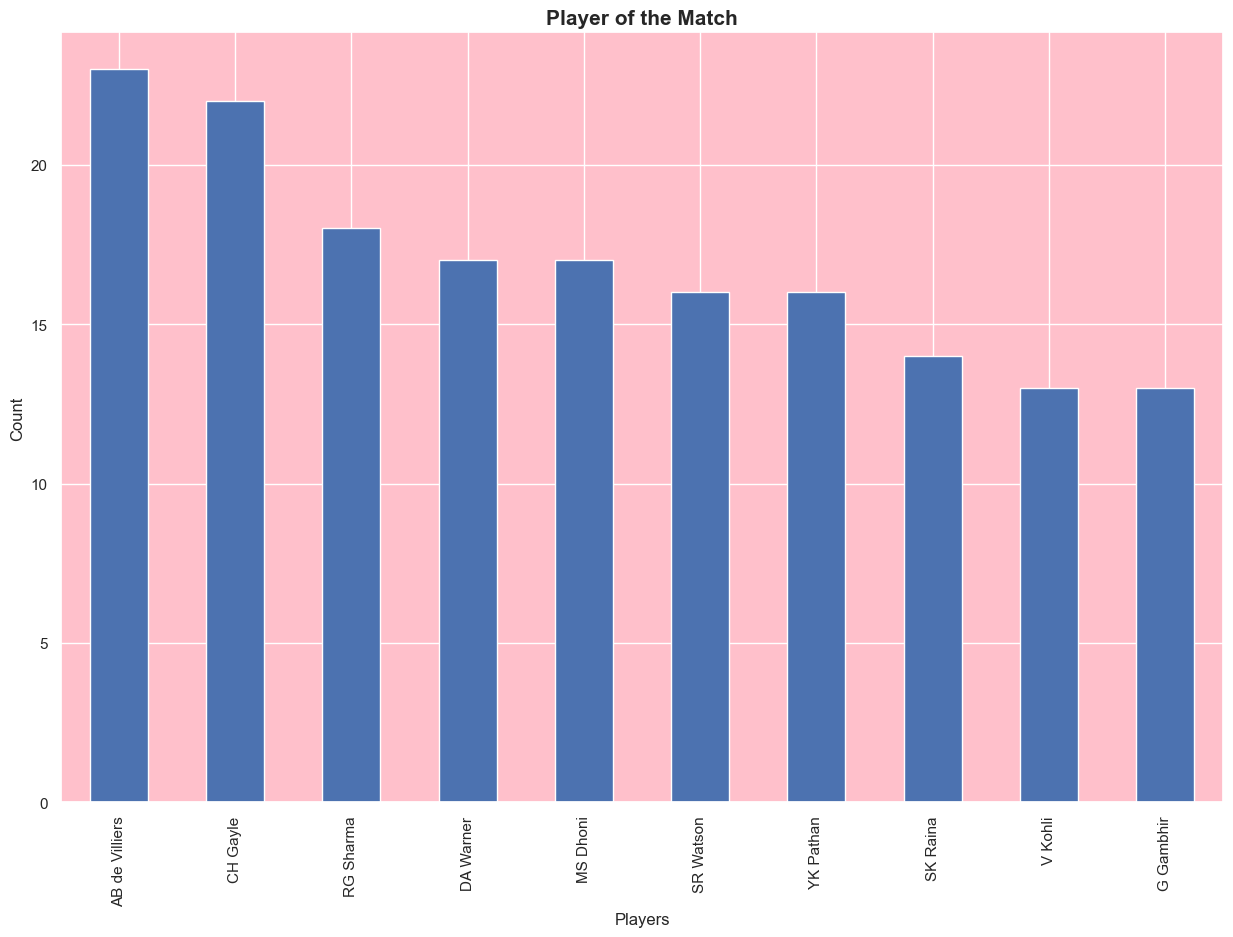

In [106]:
ax =plt.axes()
ax.set(facecolor='pink')
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title('Player of the Match' ,fontsize=15,fontweight="bold")